## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
from modules.data_gathering import get_working_dataset

In [2]:
df = get_working_dataset()

supervised_flights_sample.csv exists. Reading from data folder


In [99]:
df.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,arr_delay,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,lat,lng
count,99426.000000,99426.000000,99426.000000,99426.000000,99426.000000,99426.000000,99425.000000,99426.0,99426.000000,97489.000000,99426.000000,18841.000000,18841.000000,18841.000000,18841.000000,18841.000000,99426.000000,99426.000000
mean,2736.086124,2736.012713,12679.558888,12679.496178,1332.782431,1485.454086,138.164576,1.0,770.610967,5.399481,0.016615,20.370946,3.694125,16.007006,0.077915,26.911682,37.153943,-94.292046
std,1859.400357,1859.332934,1521.687634,1524.873692,491.138019,520.139802,71.710737,0.0,586.339945,49.435901,0.127826,65.153575,31.059508,36.092636,2.481991,50.208644,5.767038,17.962303
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,20.000000,1.0,31.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.012700,-166.568000
25%,1142.000000,1142.000000,11292.000000,11292.000000,918.000000,1100.000000,87.000000,1.0,342.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.736700,-106.836900
50%,2315.000000,2315.000000,12889.000000,12889.000000,1325.000000,1514.000000,119.000000,1.0,604.000000,-6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,37.755800,-87.686600
75%,4321.000000,4321.000000,14057.000000,14057.000000,1737.000000,1919.000000,168.000000,1.0,1005.000000,8.000000,0.000000,17.000000,0.000000,19.000000,0.000000,34.000000,40.777600,-80.830300
max,9388.000000,9388.000000,16869.000000,16869.000000,2359.000000,2359.000000,690.000000,1.0,5095.000000,1610.000000,1.000000,1576.000000,1078.000000,1055.000000,254.000000,1219.000000,66.876600,-66.061000


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

<AxesSubplot:ylabel='Density'>

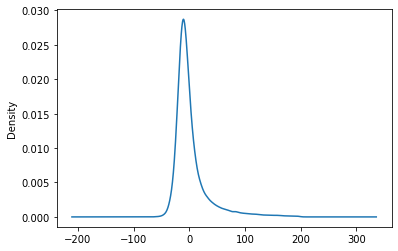

In [8]:
arr = df.loc[df["arr_delay"] < 200, "arr_delay"]

arr.plot.kde()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
df["fl_date"] = pd.to_datetime(df["fl_date"])
flight_delays = df[["fl_date", "arr_delay"]].set_index("fl_date")

def plot_bars(agg_func):
  agg = flight_delays.groupby([flight_delays.index.year, flight_delays.index.month]).agg(agg_func)
  fig, ax = plt.subplots(figsize=(20,10))
  x=agg.loc[2018].reset_index()["fl_date"]
  y=agg.loc[2018].reset_index()["arr_delay"]
  ax.bar(x, y, label="2018", width=0.35)
  x=agg.loc[2019].reset_index()["fl_date"]
  y=agg.loc[2019].reset_index()["arr_delay"]
  ax.bar(x+0.35, y, label="2019", width=0.35)
  ax.set_xlabel("Month")
  ax.set_ylabel(f"{agg_func} Arrival Delay (Minutes)")
  ax.legend()
  plt.show()


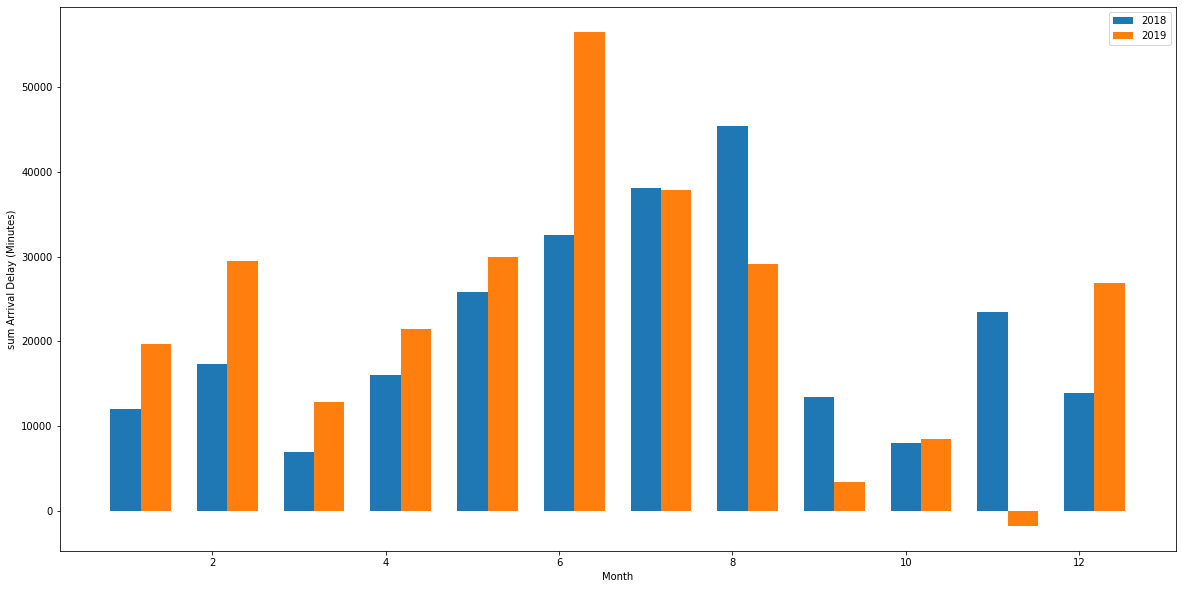

In [80]:
plot_bars("sum")

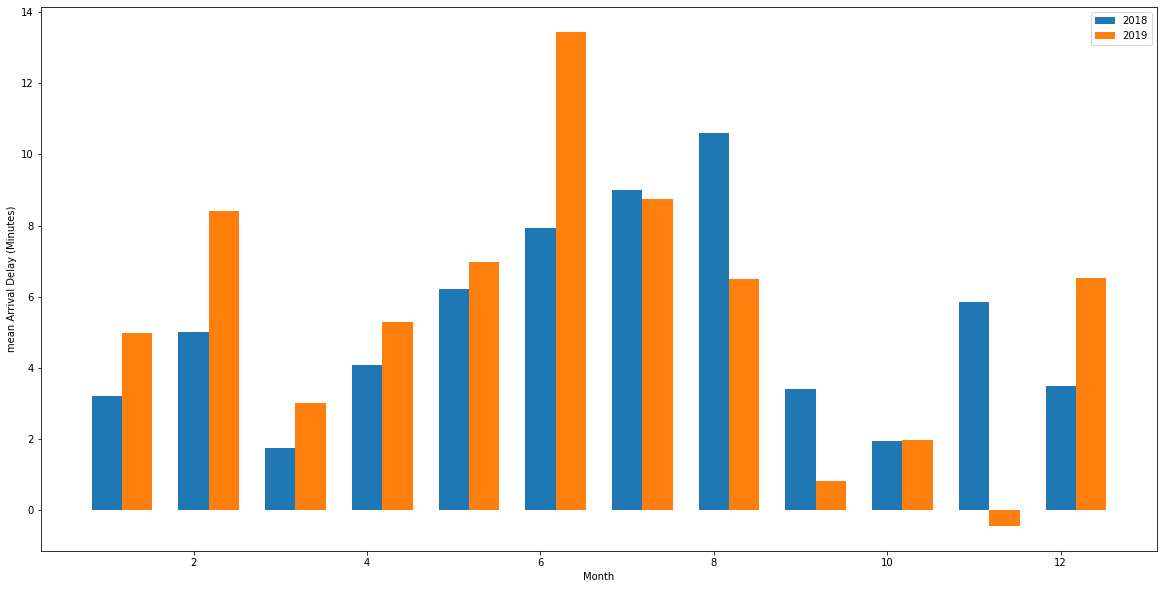

In [81]:
plot_bars("mean")

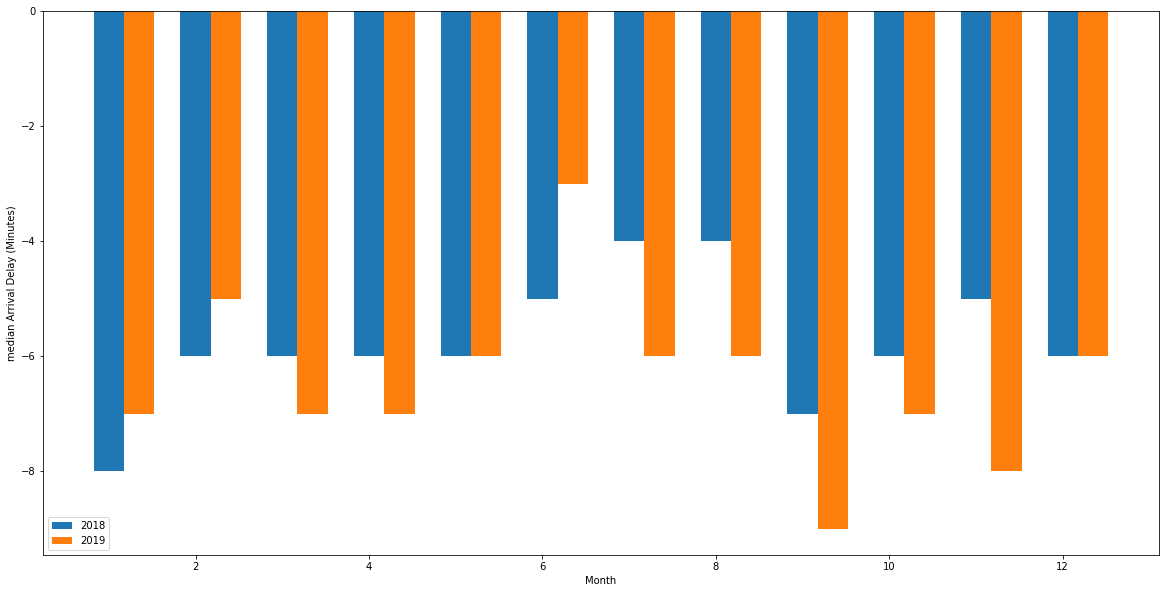

In [82]:
plot_bars("median")

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [163]:
s = df.sample(10_000)
print(s["fl_date"].min())
print(s["fl_date"].max())

2018-01-01 00:00:00
2019-12-31 00:00:00


In [91]:
wdf = pd.read_csv("../data/flights_with_weather.csv")

In [164]:
group =wdf.groupby("Type")["arr_delay"]


In [166]:
group.count()

Type
Cold               869
Fog               7445
Hail                40
Precipitation      510
Rain             22277
Snow              2621
Storm              201
Name: arr_delay, dtype: int64

In [ ]:

dfs = [group.get_group(x) for x in group.groups]


In [102]:
import scipy.stats as st

In [107]:
st.f_oneway(*dfs)

F_onewayResult(statistic=22.99529639810123, pvalue=3.06299286450936e-27)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [108]:
from modules.data_gathering import get_data_sample

taxi = get_data_sample(table_name="flights")


flights_sample.csv file exists. Retrieving from /data


In [114]:
taxi = taxi[["fl_date", "taxi_in", "taxi_out", "arr_delay"]]


In [123]:
taxi["fl_date"] = pd.to_datetime(taxi["fl_date"])


/tmp/ipykernel_13298/842577225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi["fl_date"] = pd.to_datetime(taxi["fl_date"])


In [122]:

taxi.groupby(taxi["fl_date"].dt.day).count()

,fl_date,taxi_in,taxi_out,arr_delay
fl_date,,,,
1,3241,3200,3201,3192
2,3227,3152,3153,3144
3,3360,3282,3284,3273
4,3220,3172,3173,3167
5,3178,3134,3136,3121
6,3257,3219,3221,3215
7,3257,3191,3192,3182
8,3204,3160,3162,3154
9,3244,3189,3190,3184


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

In [160]:
g = df.groupby("origin")
percentage = g.count()["fl_date"] / df.shape[0] * 100
percentage[percentage > 1.75].sum()


50.6658218172309

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?